In [1]:
# Import pandas 
import pandas as pd
import numpy as np
  
# reading csv file
# r stands for raw string, helps with unicode error (slashes)
filepath = r"C:\Users\krawc\OneDrive\Documents\DB\datasets\datacamp-master\Supervised Learning with scikit-learn\data\winequality-white.csv"
#df1 = pd.read_csv(filepath, encoding = 'utf8', index_col=0)
df1 = pd.read_csv(filepath, encoding = 'utf8')

In [35]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
y=(df1.quality<5).astype('int')
X=df1.drop('quality',axis='columns')

In [3]:
# Create train/test split for initial holdout
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21, stratify=y)

In [4]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [5]:
# Logistic Regression
# Import the necessary modules
from sklearn.linear_model import LogisticRegression


# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: knn_scaled
lreg = pipeline.fit(X_train, y_train)


# Compute and print metrics
print(lreg.score(X_test, y_test))

# Predict the labels of the test set: y_pred
y_pred = lreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.960204081632653
[[940   3]
 [ 36   1]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       943
           1       0.25      0.03      0.05        37

    accuracy                           0.96       980
   macro avg       0.61      0.51      0.51       980
weighted avg       0.94      0.96      0.94       980



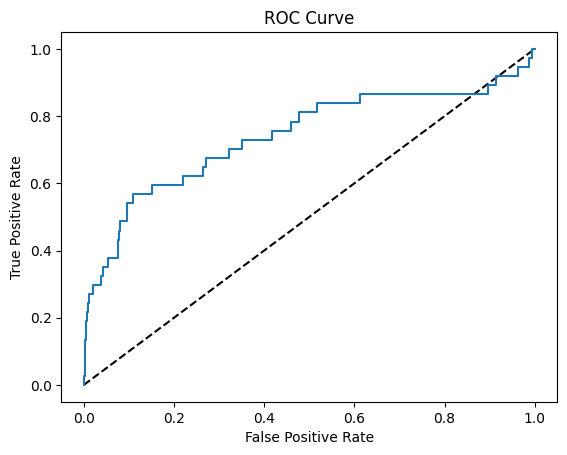

In [6]:
#ROC curve
import matplotlib.pyplot as plt

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [7]:
#AUC area under ROC - AUC jedna liczba ktora bierze pod uwage dobrze ocenione i zle ocenione nie jak accuracy ktora tylko dobrze
#-chyba tylko dla binary clasification

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))


# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(lreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7396463271330715
AUC scores computed using 5-fold cross-validation: [0.71668912 0.8487289  0.7394457  0.81789796 0.793655  ]


In [8]:
# GridSearch

# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
c_space = np.logspace(-5, 8, 15)
parameters = {'lreg__C': c_space}

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9622448979591837
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       943
           1       0.50      0.03      0.05        37

    accuracy                           0.96       980
   macro avg       0.73      0.51      0.52       980
weighted avg       0.95      0.96      0.95       980

Tuned Model Parameters: {'lreg__C': 0.05179474679231213}


In [9]:

#GridSearch
#KNN
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'knn__n_neighbors':range(1,6)}

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(cv, X, y, cv=5, scoring='roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {},{}".format(cv_auc,np.mean(cv_auc)))

Accuracy: 0.9612244897959183
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       943
           1       0.40      0.05      0.10        37

    accuracy                           0.96       980
   macro avg       0.68      0.53      0.54       980
weighted avg       0.94      0.96      0.95       980

Tuned Model Parameters: {'knn__n_neighbors': 2}
AUC scores computed using 5-fold cross-validation: [0.70667221 0.60458284 0.64565361 0.62824025 0.63964004],0.6449577891783619


In [10]:
from sklearn.svm import SVC

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(cv, X, y, cv=5, scoring='roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {},{}".format(cv_auc,np.mean(cv_auc)))

Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.62      0.14      0.22        37

    accuracy                           0.96       980
   macro avg       0.80      0.57      0.60       980
weighted avg       0.95      0.96      0.95       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}
AUC scores computed using 5-fold cross-validation: [0.71390903 0.76417987 0.7452065  0.70752327 0.74726052],0.7356158385320632


# CART

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
#CART - Classification and Regression Trees 
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1, criterion='entropy') #, criterion='gini'

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

print(classification_report(y_test, y_pred))

Test set accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       943
           1       0.27      0.11      0.15        37

    accuracy                           0.96       980
   macro avg       0.62      0.55      0.57       980
weighted avg       0.94      0.96      0.95       980



In [13]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)
# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=2)
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]



In [14]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 0.961
K Nearest Neighbours : 0.962
Classification Tree : 0.962


In [15]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.962


c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Bagging

In [16]:
# 50 drzew z rozna bootsrapowana data glosuje -> tworzy sie 50 tych samych modeli dopasowanych do innej kombincji danych
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1, oob_score=True)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

print(classification_report(y_test, y_pred))

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy: 0.959, OOB accuracy: 0.965
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       943
           1       0.43      0.27      0.33        37

    accuracy                           0.96       980
   macro avg       0.70      0.63      0.66       980
weighted avg       0.95      0.96      0.95       980



In [ ]:
#Boost Adaboost

In [17]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=200, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ROC AUC score: 0.72
